                                                         E-Commerce Analysis

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('ecommerce_cleaned.csv')
df

,CustomerID,CustomerName,Gender,Age,Country,OrderID,OrderDate,ProductCategory,ProductName,Price,...,DiscountRate,HasDiscountApplied,TotalAmount,PaymentMethod,DeviceType,ReferralSource,SessionDuration,CustomerTenureDays,ReviewScore,ReviewText
0,C132389,Anil Singh,Female,18,Usa,O278302,2024-02-27,Clothing,Zara Casual Shirt,2196.74,...,0.0,False,2196.74,Netbanking,Mobile,Organic,970.0,423.0,5.0,Nan
1,C133143,Karan Nair,Male,40,Usa,O266464,2024-12-25,Clothing,Zara Casual Shirt,1843.29,...,0.0,False,1843.29,Netbanking,Mobile,Search,240.0,917.0,3.0,Okay Product
2,C105591,Aisha Varma,Female,40,Germany,O293227,2024-04-23,Electronics,Apple Ipad 10Th,26148.78,...,0.0,False,26148.78,Upi,Mobile,Email,233.0,560.0,5.0,Very Satisfied
3,C106172,Hemender Mehta,Male,18,Uk,O201747,2024-02-20,Electronics,Apple Ipad 10Th,29340.19,...,0.0,False,29340.19,Upi,Mobile,Ad,163.0,91.0,4.0,Nan
4,C134744,Vikram Mehta,Female,36,Uk,O280004,2024-02-25,Electronics,Apple Ipad 10Th,24367.64,...,0.0,False,24367.64,Upi,Mobile,Friend,149.0,11.0,4.0,Nan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,C140533,Fatima Nair,Male,18,Uk,O206265,2024-06-18,Electronics,Apple Ipad 10Th,29838.26,...,5.0,True,28346.35,Upi,Mobile,Organic,185.0,621.0,5.0,Great Product
99996,C138850,Aisha Das,Female,44,Canada,O254886,2024-02-16,Clothing,Zara Casual Shirt,1828.11,...,0.0,False,1828.11,Upi,Mobile,Social,204.0,8.0,3.0,Nan
99997,C110615,Aisha Joseph,Male,47,India,O276820,2024-12-25,Furniture,Office Ergonomic Chair,9024.69,...,5.0,True,8573.46,Upi,Mobile,Friend,185.0,92.0,4.0,Nan
99998,C125593,Vikram Reddy,Female,37,Usa,O200860,2024-12-24,Clothing,Nike Running Shoes,3915.72,...,0.0,False,15662.88,Upi,Desktop,Social,170.0,207.0,3.0,Nothing Special


In [3]:
df.shape

(100000, 21)

                                                     Data Analysis and Visualisation

Dataset Overview

1)How many total orders, unique customers, and products are there?

In [4]:
total_orders = df['OrderID'].nunique()
total_orders

100000

In [5]:
unique_customers = df['CustomerID'].nunique()
unique_customers

43197

In [6]:
unique_products = df['ProductName'].nunique()
unique_products

26

In [7]:
print("Total unique orders:", total_orders)
print("Unique customers:", unique_customers)
print("Unique products:", unique_products)

Total unique orders: 100000
Unique customers: 43197
Unique products: 26


Total unique orders: 100000,
Unique customers: 43197,
Unique products: 26

2)What’s the overall sales volume (sum of TotalAmount)?

In [8]:
total_sales = df['TotalAmount'].sum()
print(f"Total Sales Volume: ₹{total_sales:,.2f}")

Total Sales Volume: ₹1,664,617,712.91


Total Sales Volume: ₹1,664,617,712.91

3)What’s the average order value (AOV)?

In [9]:
aov = df['TotalAmount'].sum() / df['OrderID'].nunique()
print(f"Average Order Value (AOV): ₹{aov:,.2f}")

Average Order Value (AOV): ₹16,646.18


Average Order Value (AOV): ₹16,646.18

4)How many countries are represented, and which has the most orders?

In [10]:
num_countries = df['Country'].nunique()

country_orders = (
    df['Country']
    .value_counts()
    .reset_index()
    
)

print(f"Total countries represented: {num_countries}")
print("\nTop countries by order volume:")
print(country_orders.head())

Total countries represented: 5

Top countries by order volume:
   Country  count
0      Usa  40052
1    India  30040
2       Uk  14930
3   Canada   9927
4  Germany   5051


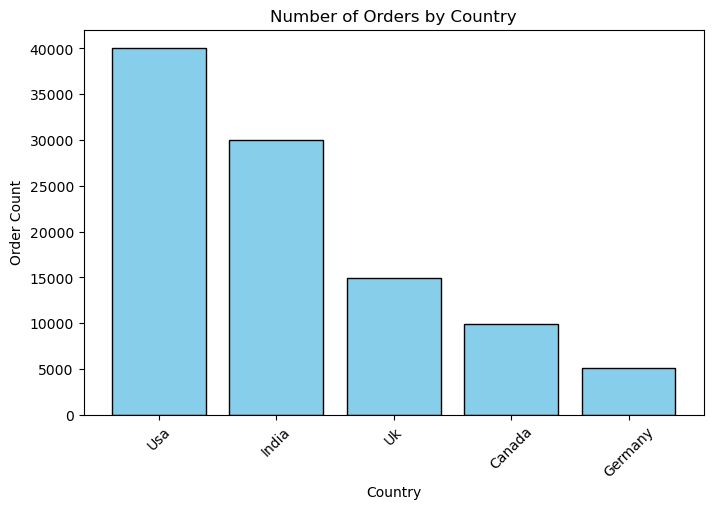

In [11]:
country_orders = df['Country'].value_counts()
plt.figure(figsize=(8,5))
plt.bar(country_orders.index, country_orders.values, color='skyblue', edgecolor='black')
plt.title('Number of Orders by Country')
plt.xlabel('Country')
plt.ylabel('Order Count')
plt.xticks(rotation=45)
plt.show()


Total countries represented: 5

Top countries by order volume:
   Country:count:(
      Usa :40052,
    India  :30040,
       Uk  :14930,
   Canada   :9927,
  Germany   :5051

5)What’s the date range of sales data?

In [12]:
df['OrderDate'].dtype

dtype('O')

In [14]:
df['OrderDate'] = pd.to_datetime(df['OrderDate'], errors='coerce')


In [15]:
df['OrderDate'].min(), df['OrderDate'].max()

(Timestamp('2024-01-01 00:00:00'), Timestamp('2024-12-31 00:00:00'))

date range of sales data=(Timestamp('2024-01-01 00:00:00'), Timestamp('2024-12-31 00:00:00'))

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 21 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   CustomerID          100000 non-null  object        
 1   CustomerName        100000 non-null  object        
 2   Gender              100000 non-null  object        
 3   Age                 100000 non-null  int64         
 4   Country             100000 non-null  object        
 5   OrderID             100000 non-null  object        
 6   OrderDate           99800 non-null   datetime64[ns]
 7   ProductCategory     100000 non-null  object        
 8   ProductName         100000 non-null  object        
 9   Price               100000 non-null  float64       
 10  Quantity            100000 non-null  int64         
 11  DiscountRate        100000 non-null  float64       
 12  HasDiscountApplied  100000 non-null  bool          
 13  TotalAmount         100000 non

Product & Category Insights

1.Which product category has the highest total sales?

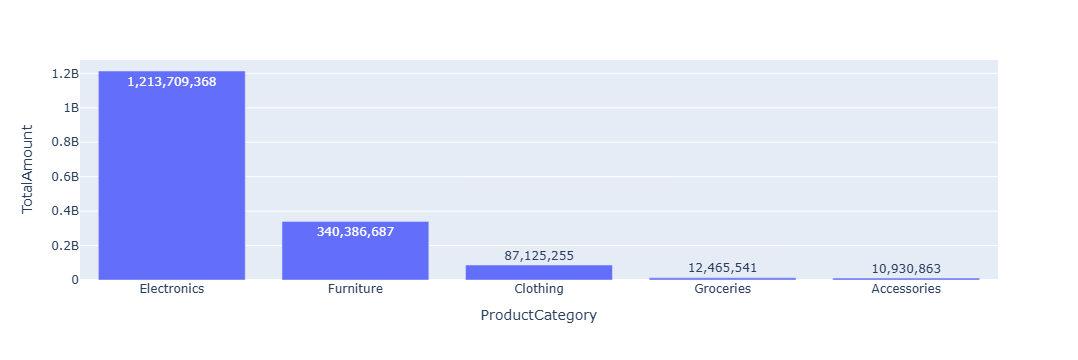

In [20]:
category_sales = (
    df.groupby('ProductCategory')['TotalAmount']
      .sum()
      .sort_values(ascending=False)
      .reset_index()
)

fig = px.bar(
    category_sales,
    x='ProductCategory',
    y='TotalAmount',
    text_auto='.2s',
    title='Total Sales by Product Category',
    color='ProductCategory'
)
fig.update_layout(xaxis_title='Category', yaxis_title='Total Sales (₹)', showlegend=False)
fig = px.bar(category_sales, x='ProductCategory', y='TotalAmount', text='TotalAmount')
fig.update_traces(texttemplate='%{text:,.0f}')
fig.show()


Electronics has Highest Sales

2.Which category has the highest average price?

In [21]:
avg_price_cat = (
    df.groupby('ProductCategory')['Price']
      .mean()
      .sort_values(ascending=False)
      .reset_index()
)

print(avg_price_cat)


  ProductCategory         Price
0     Electronics  27070.066063
1       Furniture  13378.099073
2        Clothing   2249.746781
3     Accessories   1720.664049
4       Groceries    976.669869


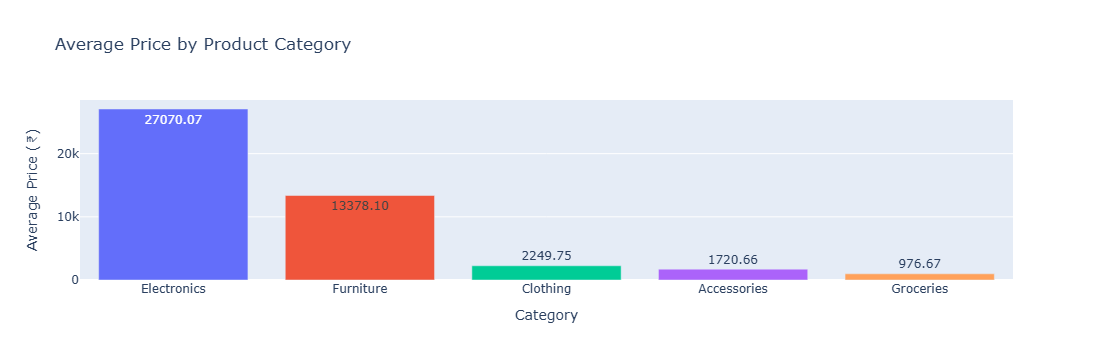

In [22]:
fig = px.bar(
    avg_price_cat,
    x='ProductCategory',
    y='Price',
    text_auto='.2f',
    title='Average Price by Product Category',
    color='ProductCategory'
)
fig.update_layout(xaxis_title='Category', yaxis_title='Average Price (₹)', showlegend=False)
fig.show()


Electronics has high avg price

3.Which individual products are top-selling by revenue and quantity?

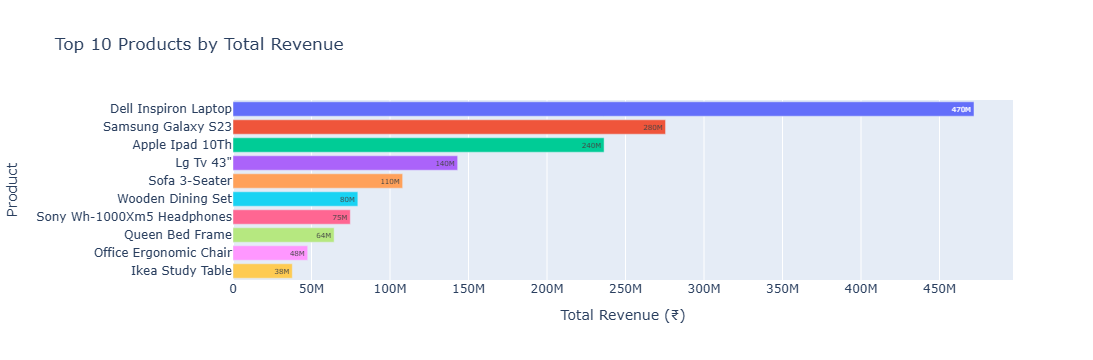

In [23]:
top_products_revenue = (
    df.groupby('ProductName')['TotalAmount']
      .sum()
      .sort_values(ascending=False)
      .head(10)
      .reset_index()
)



fig = px.bar(
    top_products_revenue,
    x='TotalAmount',
    y='ProductName',
    orientation='h',
    text_auto='.2s',
    title='Top 10 Products by Total Revenue',
    color='ProductName'
)
fig.update_layout(xaxis_title='Total Revenue (₹)', yaxis_title='Product', showlegend=False)
fig.show()


Dell Inspiron Laptop Top selling By revenue 

In [28]:
df.groupby('ProductName')['Quantity'].sum().sort_values(ascending=False).head(10).reset_index()

,ProductName,Quantity
0,"Lg Tv 43""",9447
1,Dell Inspiron Laptop,9375
2,Apple Ipad 10Th,9332
3,Sony Wh-1000Xm5 Headphones,9287
4,Samsung Galaxy S23,9155
5,Zara Casual Shirt,8204
6,Levi Jeans 501,8156
7,Puma Sports Tee,8106
8,Nike Running Shoes,8026
9,H&M Hoodie,7932


In [29]:
top_product_quantity=df.groupby('ProductName')['Quantity'].sum().sort_values(ascending=False).head(10).reset_index()

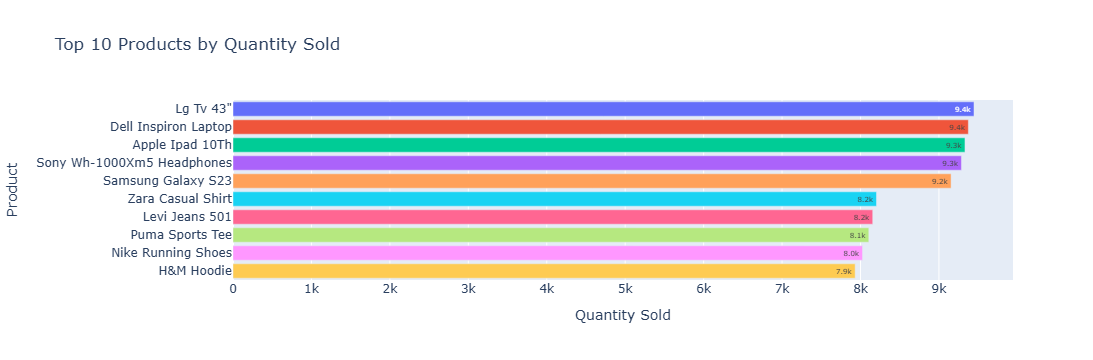

In [35]:
fig = px.bar(
    top_product_quantity,
    x='Quantity',
    y='ProductName',
    orientation='h',
    text_auto='.2s',
    title='Top 10 Products by Quantity Sold',
    color='ProductName'
)
fig.update_layout(xaxis_title='Quantity Sold', yaxis_title='Product', showlegend=False)
fig.show()


LG tv and dell laptop is the most sold product by quantity

4.Are there any low-performing categories or products?

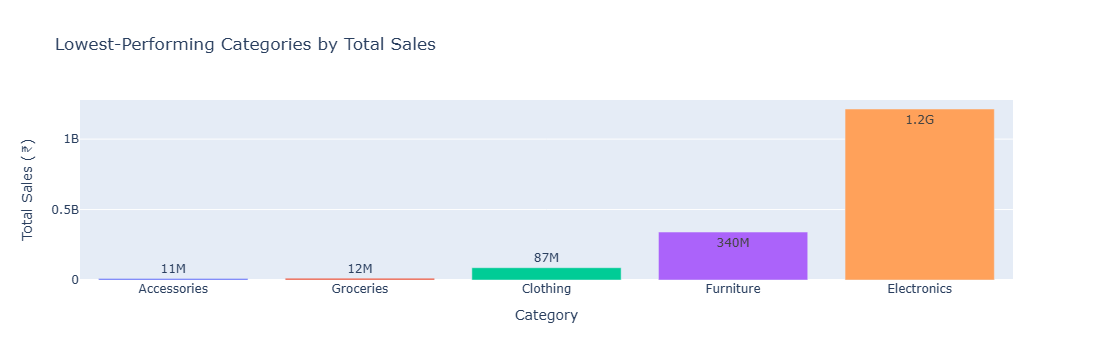

In [37]:
low_cat_sales = (
    df.groupby('ProductCategory')['TotalAmount']
      .sum()
      .sort_values(ascending=True)
      .reset_index()
)

fig = px.bar(
    low_cat_sales,
    x='ProductCategory',
    y='TotalAmount',
    text_auto='.2s',
    title='Lowest-Performing Categories by Total Sales',
    color='ProductCategory'
)
fig.update_layout(
    xaxis_title='Category',
    yaxis_title='Total Sales (₹)',
    showlegend=False
)
fig.show()


Accessories are lowest Performing Category by Total Sales

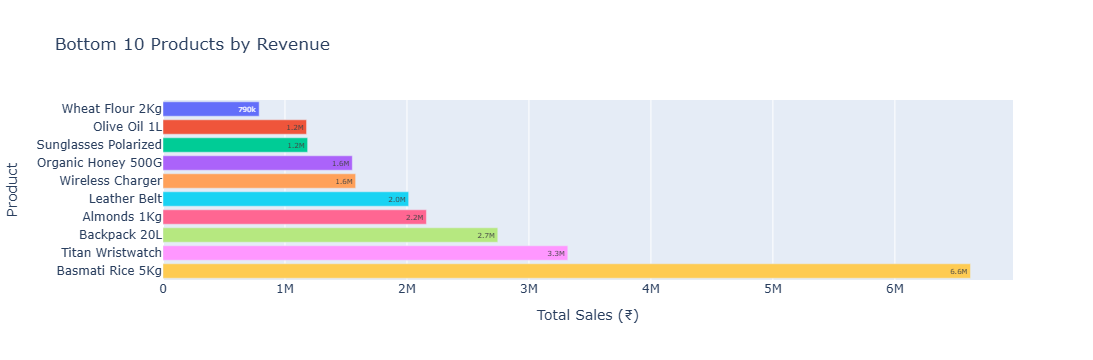

In [38]:
low_products = (
    df.groupby('ProductName')['TotalAmount']
      .sum()
      .sort_values(ascending=True)
      .head(10)
      .reset_index()
)

fig = px.bar(
    low_products,
    x='TotalAmount',
    y='ProductName',
    orientation='h',
    text_auto='.2s',
    title='Bottom 10 Products by Revenue',
    color='ProductName'
)
fig.update_layout(xaxis_title='Total Sales (₹)', yaxis_title='Product', showlegend=False)
fig.show()


Wheat flour is lowest sold product by revenue

5.How do discounts vary across categories?

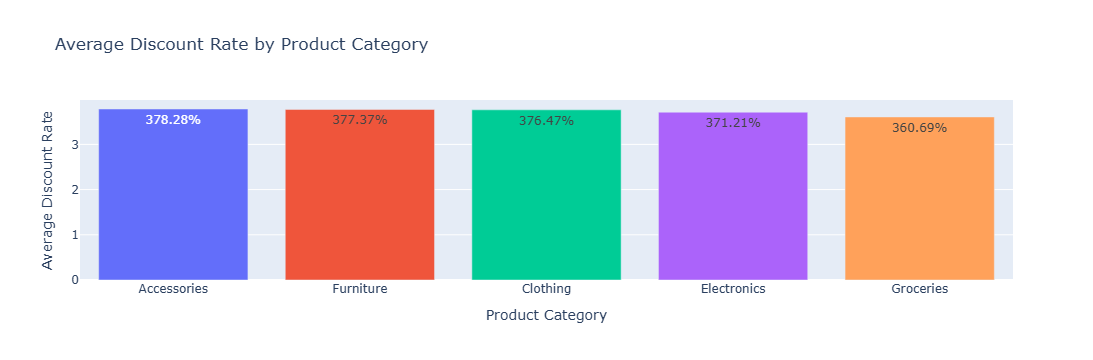

In [40]:
discount_by_category = (
    df.groupby('ProductCategory')['DiscountRate']
      .mean()
      .sort_values(ascending=False)
      .reset_index()
)

fig = px.bar(
    discount_by_category,
    x='ProductCategory',
    y='DiscountRate',
    text_auto='.2%',
    title='Average Discount Rate by Product Category',
    color='ProductCategory'
)
fig.update_layout(
    xaxis_title='Product Category',
    yaxis_title='Average Discount Rate',
    showlegend=False
)
fig.show()


Accessories has highest discount rates so they are hoping sales will increase by high discount rates as already accessories is underperforming

Customer Behavior

1.What’s the gender distribution of customers?

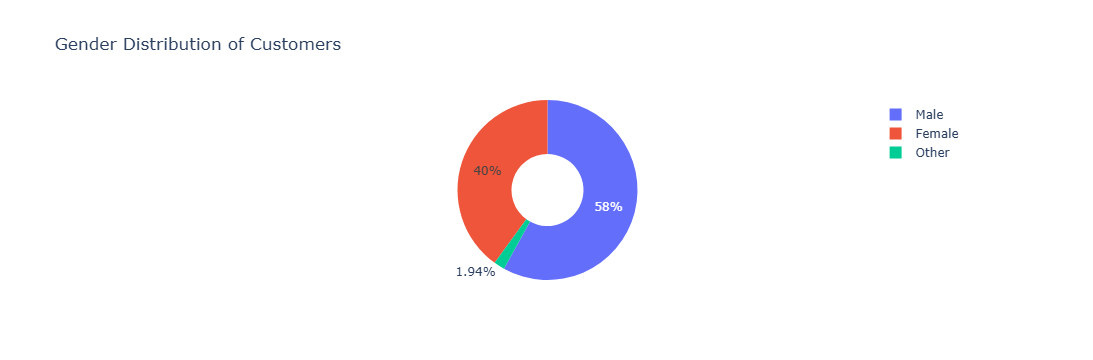

In [43]:
gender_counts = df['Gender'].value_counts().reset_index()
gender_counts.columns = ['Gender', 'Count']

fig = px.pie(
    gender_counts,
    names='Gender',
    values='Count',
    title='Gender Distribution of Customers',
    hole=0.4
)
fig.show()


male make up 58% , female make up 40% , others 2% 

2.Do male/female customers spend differently (compare avg TotalAmount)?

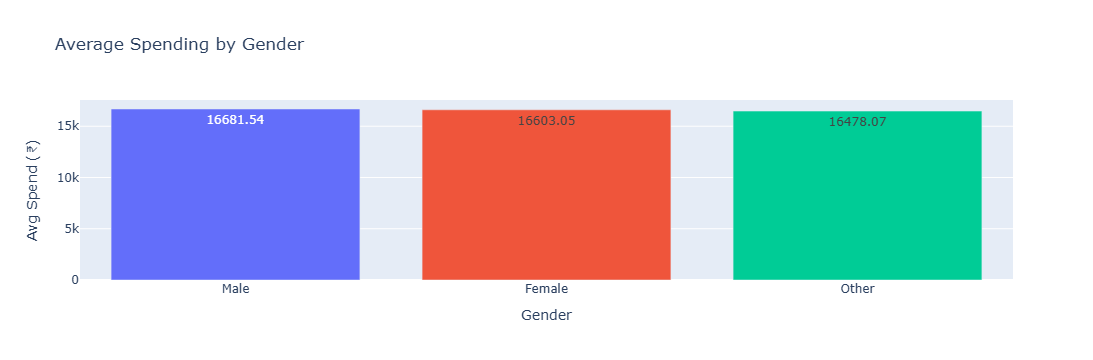

In [44]:
gender_spend = (
    df.groupby('Gender')['TotalAmount']
      .mean()
      .sort_values(ascending=False)
      .reset_index()
)

fig = px.bar(
    gender_spend,
    x='Gender',
    y='TotalAmount',
    text_auto='.2f',
    color='Gender',
    title='Average Spending by Gender'
)
fig.update_layout(xaxis_title='Gender', yaxis_title='Avg Spend (₹)', showlegend=False)
fig.show()


all are almost similar spending men 16681.54 , women 166023.05

3.Which age group contributes most to total sales?

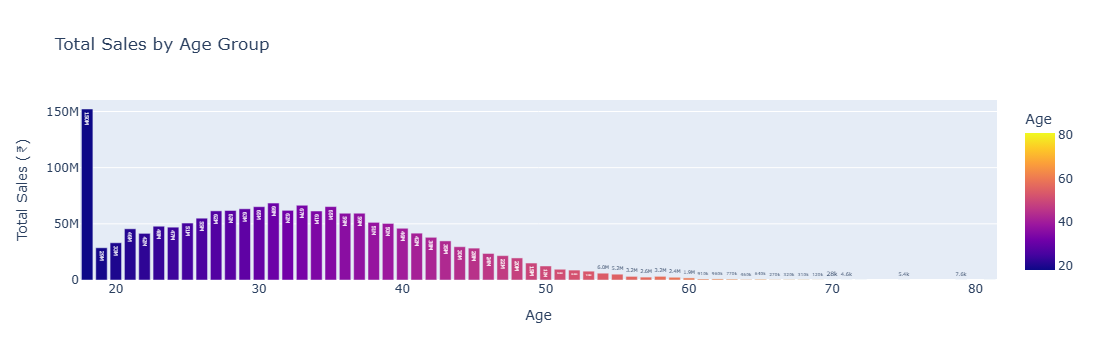

In [46]:
age_sales = (
    df.groupby('Age')['TotalAmount']
      .sum()
      .reset_index()
)

fig = px.bar(
    age_sales,
    x='Age',
    y='TotalAmount',
    title='Total Sales by Age Group',
    text_auto='.2s',
    color='Age'
)
fig.update_layout(xaxis_title='Age', yaxis_title='Total Sales (₹)', showlegend=False)
fig.show()


youth and teenagers spend more

4.Which countries have the highest spending per customer?

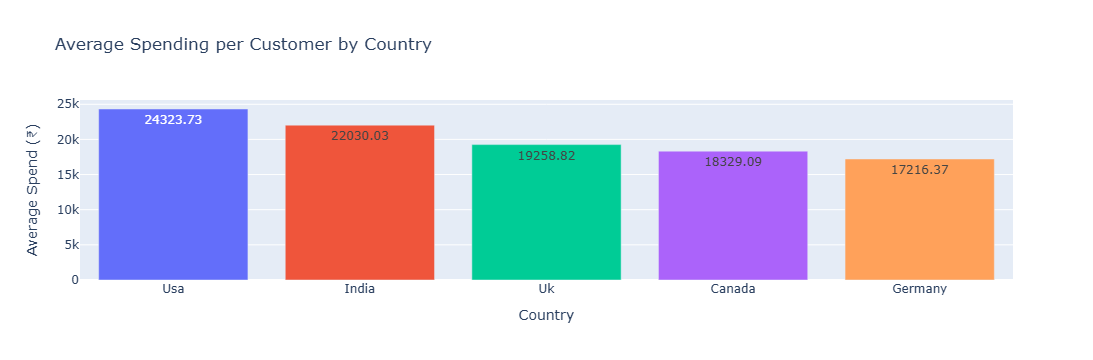

In [47]:
country_avg_spend = (
    df.groupby('Country')['TotalAmount']
      .sum()
      .div(df.groupby('Country')['CustomerID'].nunique())
      .reset_index(name='AvgSpendPerCustomer')
      .sort_values('AvgSpendPerCustomer', ascending=False)
)

fig = px.bar(
    country_avg_spend,
    x='Country',
    y='AvgSpendPerCustomer',
    text_auto='.2f',
    color='Country',
    title='Average Spending per Customer by Country'
)
fig.update_layout(xaxis_title='Country', yaxis_title='Average Spend (₹)', showlegend=False)
fig.show()


usa spends more on avg india is next

5.Do older or younger customers give higher review scores?

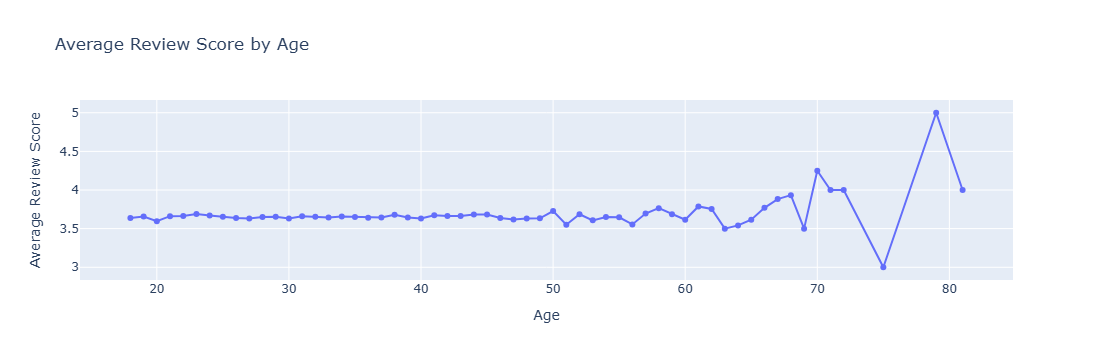

In [48]:
age_review = (
    df.groupby('Age')['ReviewScore']
      .mean()
      .reset_index()
)

fig = px.line(
    age_review,
    x='Age',
    y='ReviewScore',
    markers=True,
    title='Average Review Score by Age'
)
fig.update_layout(xaxis_title='Age', yaxis_title='Average Review Score')
fig.show()


older people tend to give higher scores

Transaction & Payment Analysis

1.Which payment method is most used overall?

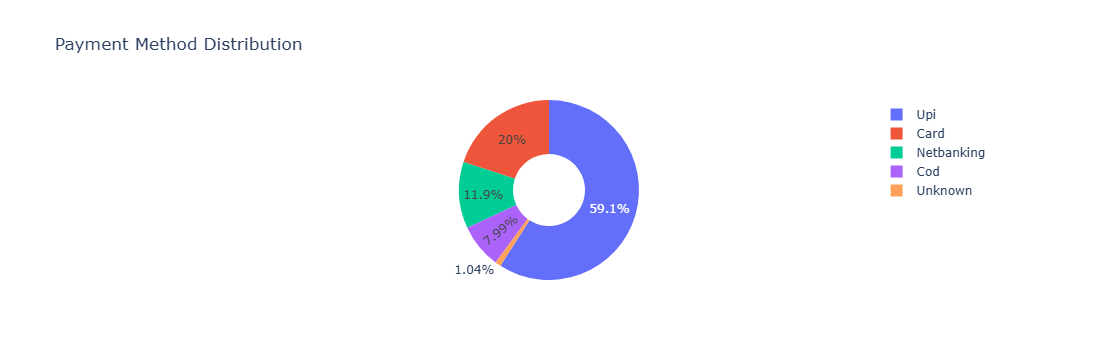

In [49]:
payment_counts = df['PaymentMethod'].value_counts().reset_index()
payment_counts.columns = ['PaymentMethod', 'Count']

fig = px.pie(
    payment_counts,
    names='PaymentMethod',
    values='Count',
    title='Payment Method Distribution',
    hole=0.4
)
fig.show()


UPI is highest

2.Which payment method generates the most revenue?

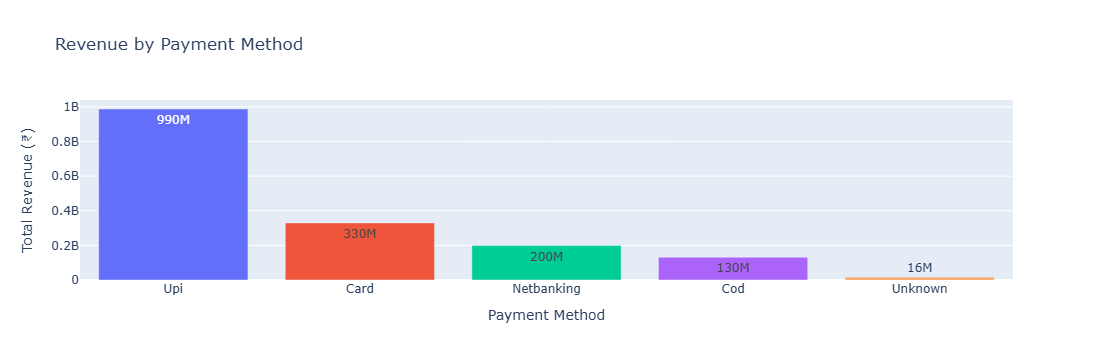

In [50]:
payment_revenue = (
    df.groupby('PaymentMethod')['TotalAmount']
      .sum()
      .sort_values(ascending=False)
      .reset_index()
)

fig = px.bar(
    payment_revenue,
    x='PaymentMethod',
    y='TotalAmount',
    text_auto='.2s',
    title='Revenue by Payment Method',
    color='PaymentMethod'
)
fig.update_layout(xaxis_title='Payment Method', yaxis_title='Total Revenue (₹)', showlegend=False)
fig.show()


UPI

3.What percentage of transactions had discounts applied?

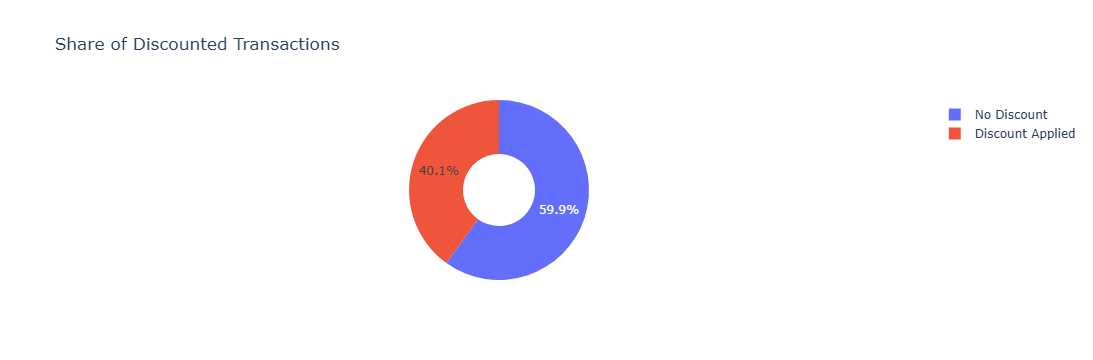

In [51]:
discount_share = df['HasDiscountApplied'].value_counts(normalize=True) * 100

fig = px.pie(
    names=discount_share.index.map({True: 'Discount Applied', False: 'No Discount'}),
    values=discount_share.values,
    title='Share of Discounted Transactions',
    hole=0.4
)
fig.show()


40%

Time-based Trends

1.How do total sales change month by month?

C:\Users\hemen\AppData\Local\Temp\ipykernel_28000\1174408158.py:2: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.



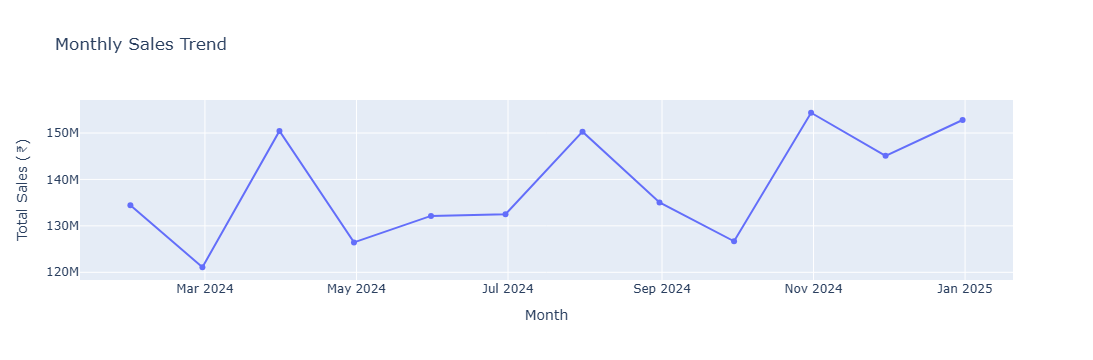

In [53]:
monthly_sales = (
    df.groupby(pd.Grouper(key='OrderDate', freq='M'))['TotalAmount']
      .sum()
      .reset_index()
)

fig = px.line(
    monthly_sales,
    x='OrderDate',
    y='TotalAmount',
    markers=True,
    title='Monthly Sales Trend'
)
fig.update_layout(xaxis_title='Month', yaxis_title='Total Sales (₹)')
fig.show()


highest near nov

2.Which months or quarters show peaks — any seasonal trends?

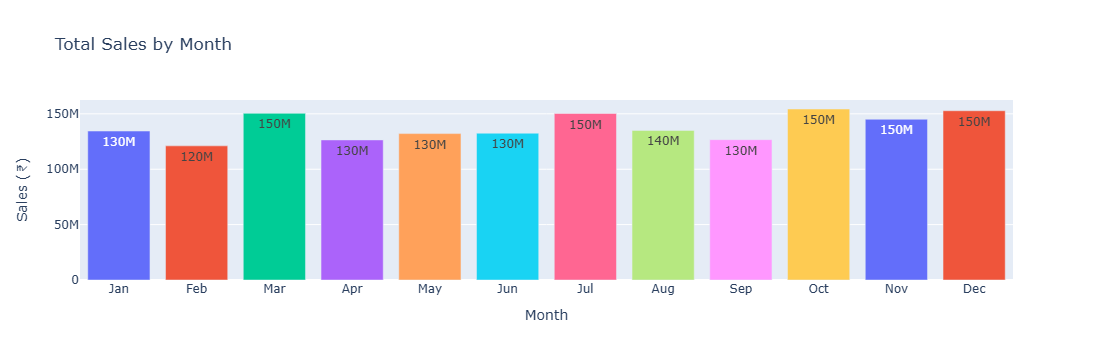

In [54]:
monthly_sales['Month'] = monthly_sales['OrderDate'].dt.strftime('%b')

fig = px.bar(
    monthly_sales,
    x='Month',
    y='TotalAmount',
    text_auto='.2s',
    title='Total Sales by Month',
    color='Month'
)
fig.update_layout(xaxis_title='Month', yaxis_title='Sales (₹)', showlegend=False)
fig.show()


Oct,Nov,Dec show peak due to festive season

3.	Is there a day-of-week pattern in order volume?

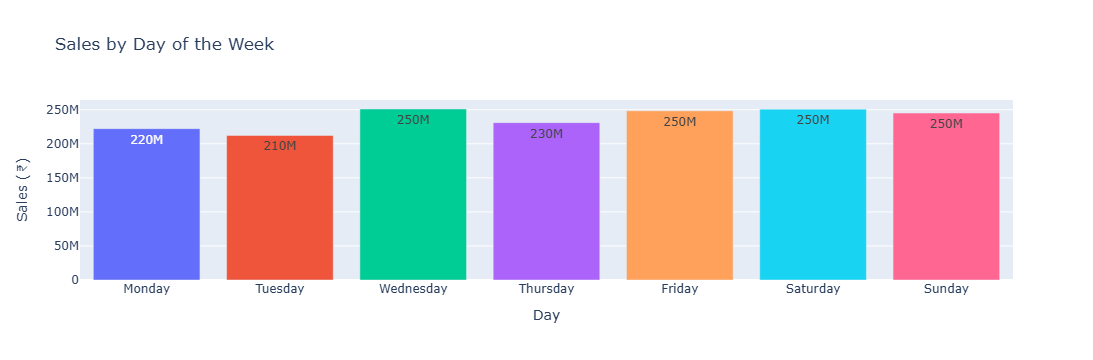

In [55]:
df['DayOfWeek'] = df['OrderDate'].dt.day_name()

day_sales = (
    df.groupby('DayOfWeek')['TotalAmount']
      .sum()
      .reindex(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
      .reset_index()
)

fig = px.bar(
    day_sales,
    x='DayOfWeek',
    y='TotalAmount',
    text_auto='.2s',
    title='Sales by Day of the Week',
    color='DayOfWeek'
)
fig.update_layout(xaxis_title='Day', yaxis_title='Sales (₹)', showlegend=False)
fig.show()


execpt tuesday and thursday sales seems uniform

4.Are weekends stronger than weekdays for sales?

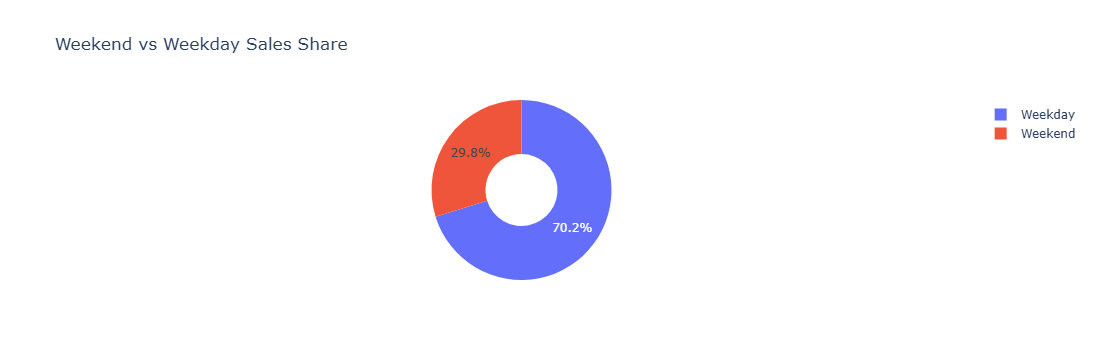

In [56]:
df['IsWeekend'] = df['OrderDate'].dt.dayofweek >= 5
weekend_sales = (
    df.groupby('IsWeekend')['TotalAmount']
      .sum()
      .reset_index()
)

fig = px.pie(
    weekend_sales,
    names=weekend_sales['IsWeekend'].map({True:'Weekend', False:'Weekday'}),
    values='TotalAmount',
    title='Weekend vs Weekday Sales Share',
    hole=0.4
)
fig.show()


weekend has high sales share

5.How does average order value vary over time?

C:\Users\hemen\AppData\Local\Temp\ipykernel_28000\4057422915.py:2: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.



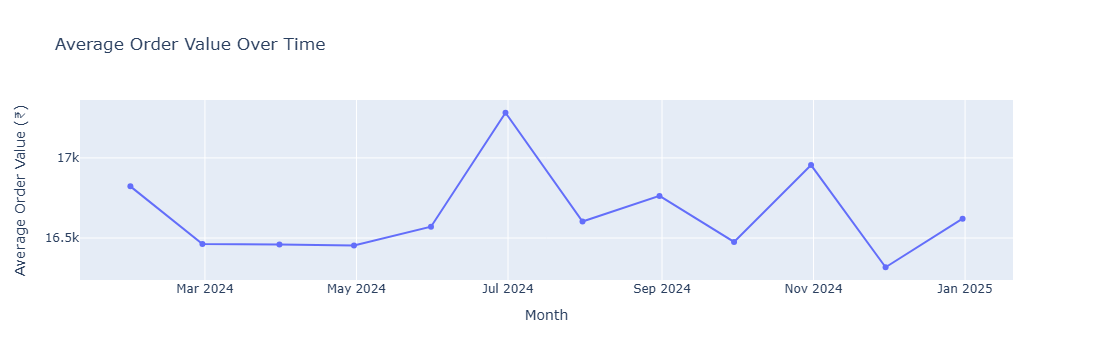

In [57]:
aov_trend = (
    df.groupby(pd.Grouper(key='OrderDate', freq='M'))['TotalAmount']
      .mean()
      .reset_index()
)

fig = px.line(
    aov_trend,
    x='OrderDate',
    y='TotalAmount',
    markers=True,
    title='Average Order Value Over Time'
)
fig.update_layout(xaxis_title='Month', yaxis_title='Average Order Value (₹)')
fig.show()


july has high AOV

Country-Level Insights

1.Which countries generate the highest total revenue?

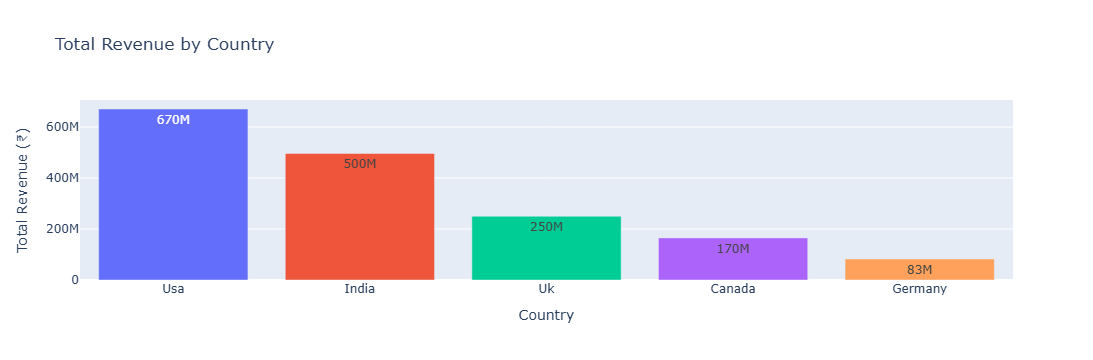

In [59]:
country_revenue = (
    df.groupby('Country')['TotalAmount']
      .sum()
      .sort_values(ascending=False)
      .reset_index()
)

fig = px.bar(
    country_revenue,
    x='Country',
    y='TotalAmount',
    text_auto='.2s',
    title='Total Revenue by Country',
    color='Country'
)
fig.update_layout(xaxis_title='Country', yaxis_title='Total Revenue (₹)', showlegend=False)
fig.show()


USA has highest 670M

2.Which countries have the highest average order value?

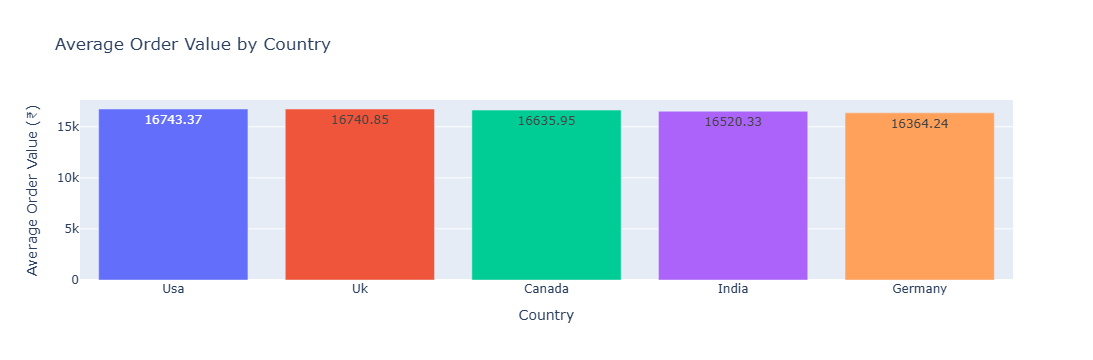

In [60]:
country_aov = (
    df.groupby('Country')['TotalAmount']
      .mean()
      .sort_values(ascending=False)
      .reset_index()
)

fig = px.bar(
    country_aov,
    x='Country',
    y='TotalAmount',
    text_auto='.2f',
    title='Average Order Value by Country',
    color='Country'
)
fig.update_layout(xaxis_title='Country', yaxis_title='Average Order Value (₹)', showlegend=False)
fig.show()


USA

3.Is review sentiment (ReviewScore) higher in certain regions?

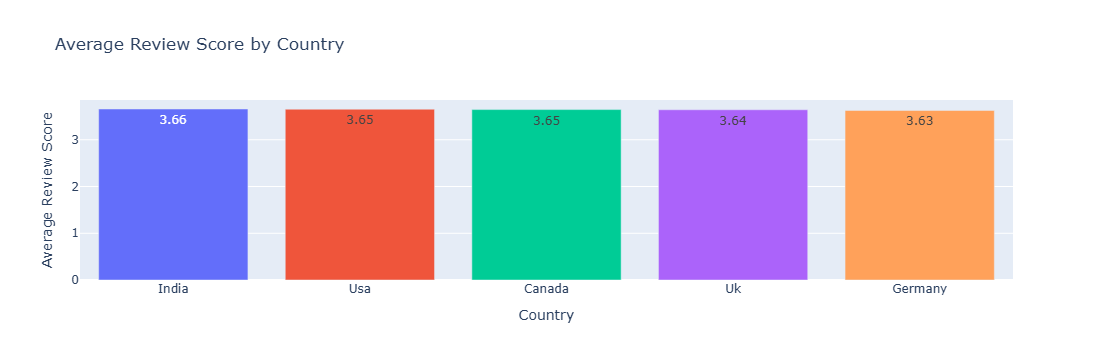

In [61]:
country_reviews = (
    df.groupby('Country')['ReviewScore']
      .mean()
      .sort_values(ascending=False)
      .reset_index()
)

fig = px.bar(
    country_reviews,
    x='Country',
    y='ReviewScore',
    text_auto='.2f',
    title='Average Review Score by Country',
    color='Country'
)
fig.update_layout(xaxis_title='Country', yaxis_title='Average Review Score', showlegend=False)
fig.show()


almost Similar

4.Are discounts more common in specific countries?

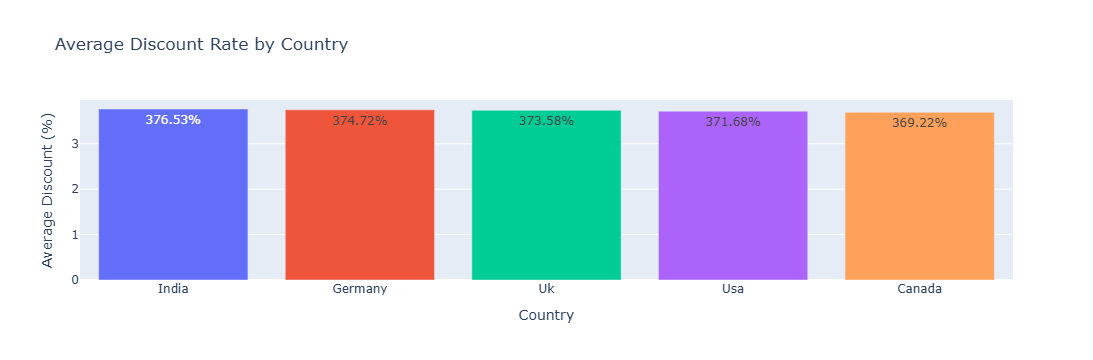

In [62]:
country_discount = (
    df.groupby('Country')['DiscountRate']
      .mean()
      .sort_values(ascending=False)
      .reset_index()
)

fig = px.bar(
    country_discount,
    x='Country',
    y='DiscountRate',
    text_auto='.2%',
    title='Average Discount Rate by Country',
    color='Country'
)
fig.update_layout(xaxis_title='Country', yaxis_title='Average Discount (%)', showlegend=False)
fig.show()


no they are distributed almost equally

Review & Feedback

1.What’s the distribution of review scores (1–5)?

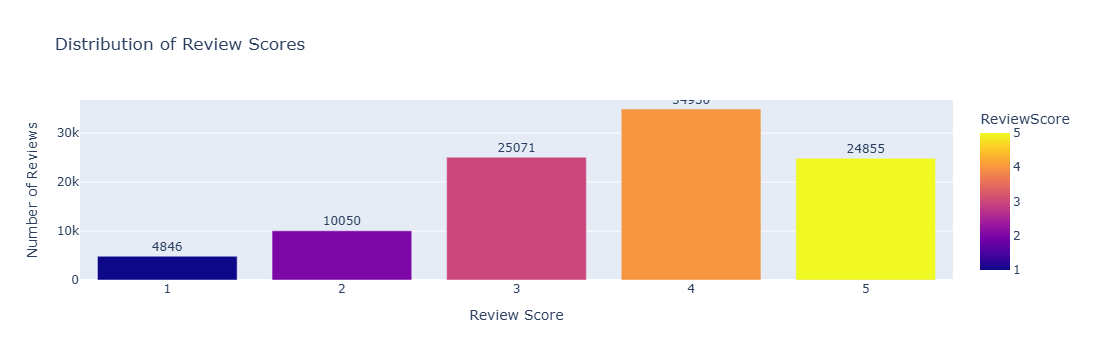

In [63]:
review_counts = df['ReviewScore'].value_counts().sort_index().reset_index()
review_counts.columns = ['ReviewScore', 'Count']

fig = px.bar(
    review_counts,
    x='ReviewScore',
    y='Count',
    text='Count',
    title='Distribution of Review Scores',
    color='ReviewScore'
)
fig.update_traces(textposition='outside')
fig.update_layout(xaxis_title='Review Score', yaxis_title='Number of Reviews', showlegend=False)
fig.show()


4 is highest 

2.Which products have the best and worst average ratings?

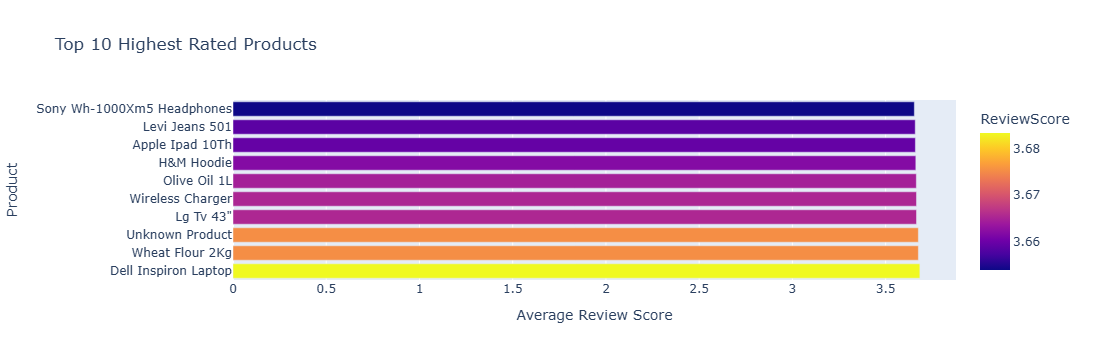

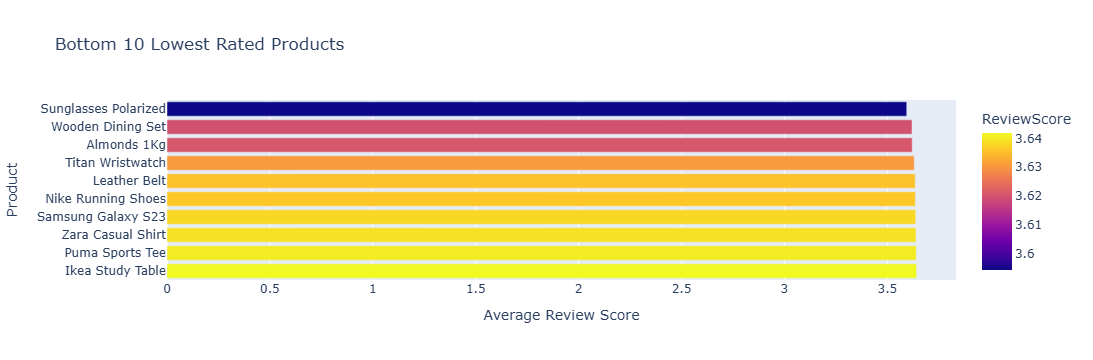

In [66]:
product_reviews = (
    df.groupby('ProductName')['ReviewScore']
      .mean()
      .sort_values(ascending=False)
      .reset_index()
)

top_rated = product_reviews.head(10)
low_rated = product_reviews.tail(10)

fig = px.bar(
    top_rated,
    x='ReviewScore',
    y='ProductName',
    orientation='h',
    title='Top 10 Highest Rated Products',
    color='ReviewScore'
)
fig.update_layout(xaxis_title='Average Review Score', yaxis_title='Product', showlegend=False)
fig.show()

fig = px.bar(
    low_rated,
    x='ReviewScore',
    y='ProductName',
    orientation='h',
    title='Bottom 10 Lowest Rated Products',
    color='ReviewScore'
)
fig.update_layout(xaxis_title='Average Review Score', yaxis_title='Product', showlegend=False)
fig.show()


sony headphones highest rated product and sunglasses is lowest

User Experience

1.Do certain device types (mobile, desktop, tablet) convert more?

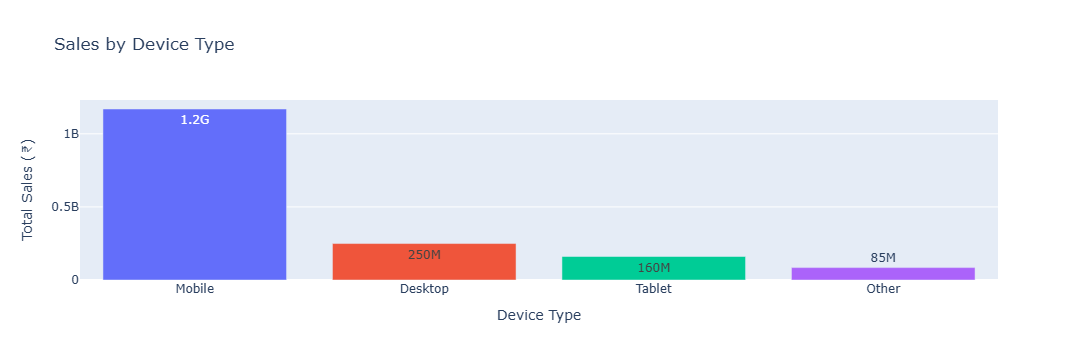

In [68]:
device_sales = (
    df.groupby('DeviceType')['TotalAmount']
      .sum()
      .sort_values(ascending=False)
      .reset_index()
)

fig = px.bar(
    device_sales,
    x='DeviceType',
    y='TotalAmount',
    text_auto='.2s',
    color='DeviceType',
    title='Sales by Device Type'
)
fig.update_layout(xaxis_title='Device Type', yaxis_title='Total Sales (₹)', showlegend=False)
fig.show()


most people shop through Mobile

2.Which referral sources (social, email, direct) lead to higher purchases?

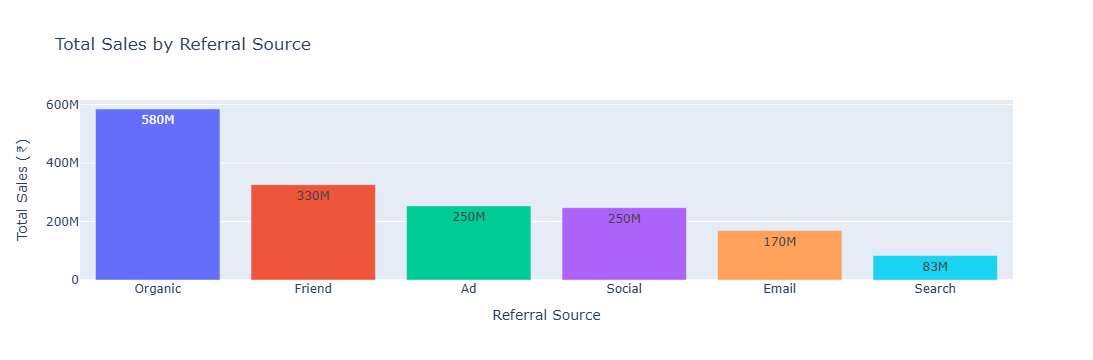

In [69]:
referral_sales = (
    df.groupby('ReferralSource')['TotalAmount']
      .sum()
      .sort_values(ascending=False)
      .reset_index()
)

fig = px.bar(
    referral_sales,
    x='ReferralSource',
    y='TotalAmount',
    text_auto='.2s',
    color='ReferralSource',
    title='Total Sales by Referral Source'
)
fig.update_layout(xaxis_title='Referral Source', yaxis_title='Total Sales (₹)', showlegend=False)
fig.show()


most people found this Organically